## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\uyang\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64, 32]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model



In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.2, 0.4, 0.6, 0.8, 0.95]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for MO in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MO = %.2f" % (MO))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MO)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-MO-%s" % str(MO)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MO = 0.20
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)           

50000/50000 [==============================] - 10s 193us/step - loss: 0.9924 - acc: 0.6470 - val_loss: 1.5254 - val_acc: 0.4866
Epoch 50/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.9799 - acc: 0.6526 - val_loss: 1.4351 - val_acc: 0.5167
Experiment with MO = 0.40
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)      

50000/50000 [==============================] - 10s 192us/step - loss: 0.9043 - acc: 0.6776 - val_loss: 1.4913 - val_acc: 0.5076
Epoch 48/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.8882 - acc: 0.6861 - val_loss: 1.5018 - val_acc: 0.5072
Epoch 49/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.8783 - acc: 0.6893 - val_loss: 1.6450 - val_acc: 0.4787
Epoch 50/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.9172 - acc: 0.6785 - val_loss: 1.8753 - val_acc: 0.4333
Experiment with MO = 0.60
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (

50000/50000 [==============================] - 10s 195us/step - loss: 0.7469 - acc: 0.7344 - val_loss: 1.9345 - val_acc: 0.4521
Epoch 46/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.7178 - acc: 0.7452 - val_loss: 1.6432 - val_acc: 0.5102
Epoch 47/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.7044 - acc: 0.7487 - val_loss: 1.6775 - val_acc: 0.5067
Epoch 48/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.6931 - acc: 0.7576 - val_loss: 1.7370 - val_acc: 0.4949
Epoch 49/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.6795 - acc: 0.7582 - val_loss: 1.8269 - val_acc: 0.5001
Epoch 50/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.6322 - acc: 0.7757 - val_loss: 1.7324 - val_acc: 0.4902
Experiment with MO = 0.80
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (Input

50000/50000 [==============================] - 10s 194us/step - loss: 0.4948 - acc: 0.8230 - val_loss: 2.0079 - val_acc: 0.4963
Epoch 44/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.4836 - acc: 0.8254 - val_loss: 1.8866 - val_acc: 0.5158
Epoch 45/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.4669 - acc: 0.8341 - val_loss: 2.1435 - val_acc: 0.4809
Epoch 46/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.4436 - acc: 0.8431 - val_loss: 1.9648 - val_acc: 0.5150
Epoch 47/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.4175 - acc: 0.8519 - val_loss: 1.9832 - val_acc: 0.5269
Epoch 48/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.3991 - acc: 0.8566 - val_loss: 2.0129 - val_acc: 0.5126
Epoch 49/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.3844 - acc: 0.8634 - val_loss: 2.1472 - val_acc: 0.5200
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 10s 194us/step - loss: 0.4156 - acc: 0.8508 - val_loss: 2.0479 - val_acc: 0.5249
Epoch 42/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.4065 - acc: 0.8543 - val_loss: 2.1533 - val_acc: 0.5268
Epoch 43/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.3921 - acc: 0.8591 - val_loss: 2.1878 - val_acc: 0.5246
Epoch 44/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.3859 - acc: 0.8603 - val_loss: 2.1648 - val_acc: 0.5252
Epoch 45/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.3699 - acc: 0.8669 - val_loss: 2.2117 - val_acc: 0.5121
Epoch 46/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.3679 - acc: 0.8704 - val_loss: 2.2215 - val_acc: 0.5154
Epoch 47/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.3266 - acc: 0.8856 - val_loss: 2.2651 - val_acc: 0.5206
Epoch 48/50
50000/50000 [=======

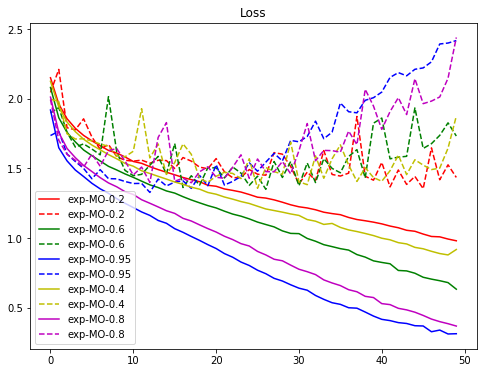

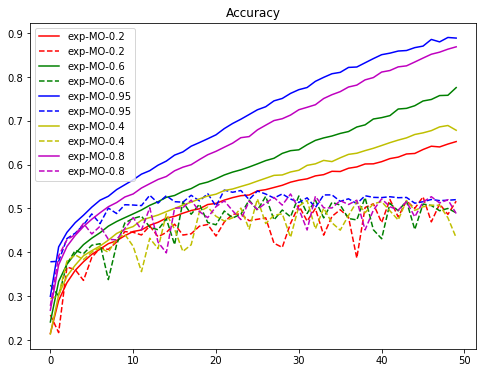

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()